In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [105]:
df = pd.read_csv("/content/drive/MyDrive/ML_Project/Data_Science_Salaries/Data/Latest_Data_Science_Salaries.csv")

In [106]:
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


In [108]:
df.describe()

,Salary,Salary in USD,Year
count,3.300000e+03,3300.000000,3300.000000
mean,2.046623e+05,142095.983939,2022.495455
std,7.279383e+05,69028.235512,0.716355
min,1.400000e+04,15000.000000,2020.000000
25%,9.416900e+04,90000.000000,2022.000000
50%,1.400000e+05,136000.000000,2023.000000
75%,1.900000e+05,185000.000000,2023.000000
max,3.040000e+07,450000.000000,2023.000000


In [109]:
count = 1
l = []

for idx, row in df.iterrows():
  if row["Company Location"] == "India":
    print(row["Job Title"],row["Salary"],row[ "Salary Currency"])
    count = count + 1
count

Machine Learning Software Engineer 2000000 Indian Rupee
Data Analytics Manager 3200000 Indian Rupee
NLP Engineer 2700000 Indian Rupee
Data Scientist 35000 United States Dollar
Machine Learning Engineer 1650000 Indian Rupee
Applied Data Scientist 1700000 Indian Rupee
Data Engineer 1400000 Indian Rupee
Data Scientist 1400000 Indian Rupee
Lead Data Analyst 1500000 Indian Rupee
Data Analyst 30000 United States Dollar
Data Analyst 1300000 Indian Rupee
Data Analyst 78000 Polish Zloty
Product Data Analyst 1350000 Indian Rupee
Research Scientist 23000 United States Dollar
Head of Data Science 5000000 Indian Rupee
Computer Vision Engineer 1250000 Indian Rupee
Data Scientist 4000000 Indian Rupee
Business Data Analyst 1440000 Indian Rupee
Lead Data Scientist 4460000 Indian Rupee
Data Engineer 2800000 Indian Rupee
Data Analyst 1250000 Indian Rupee
Principal Data Architect 3000000 Indian Rupee
Data Scientist 1800000 Indian Rupee
Lead Machine Learning Engineer 7500000 Indian Rupee
Applied Machine Le

45

In [110]:
df_copy = df.copy(deep = True)

In [111]:
job_title = []
count = 0
for index, row in df_copy.iterrows():
    if 'Machine' in row['Job Title']:
      count = count + 1
      df_copy.drop([index], inplace = True, axis = 0)
print(count)
job_title.append(count)


412


In [112]:
count = 0
for index, rows in df_copy.iterrows():
  if 'Business' in rows['Job Title']:
    count = count + 1
    df_copy.drop([index], inplace = True, axis = 0)
print(count)
job_title.append(count)

49


In [113]:
count = 0
for index, rows in df_copy.iterrows():
  if 'Scientist' in rows['Job Title']:
    count = count + 1
    df_copy.drop([index], inplace = True, axis = 0)
print(count)
job_title.append(count)

845


In [114]:
count = 0
for index, rows in df_copy.iterrows():
  if 'Analy' in rows['Job Title']:
    count = count + 1
    df_copy.drop([index], inplace = True, axis = 0)
print(count)
job_title.append(count)

706


In [115]:
count = 0
for index, rows in df_copy.iterrows():
  if 'Data' in rows['Job Title']:
    count = count + 1
    df_copy.drop([index], inplace = True, axis = 0)
print(count)
job_title.append(count)

1071


In [116]:
df_copy.shape
job_title.append(df_copy.shape[0])

In [117]:
Job_Type = ['Machine Learning', 'Business Intellgence','Scientist', 'Analysist', 'Data Job', 'Others']

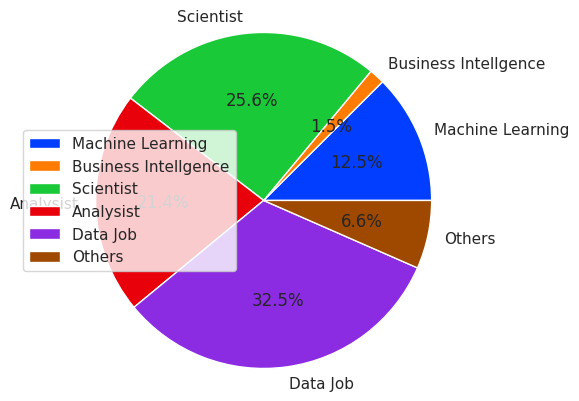

In [118]:
pallate_colour = sns.color_palette('bright')
plt.pie(job_title, labels = Job_Type, colors = pallate_colour, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Year Distrubation')

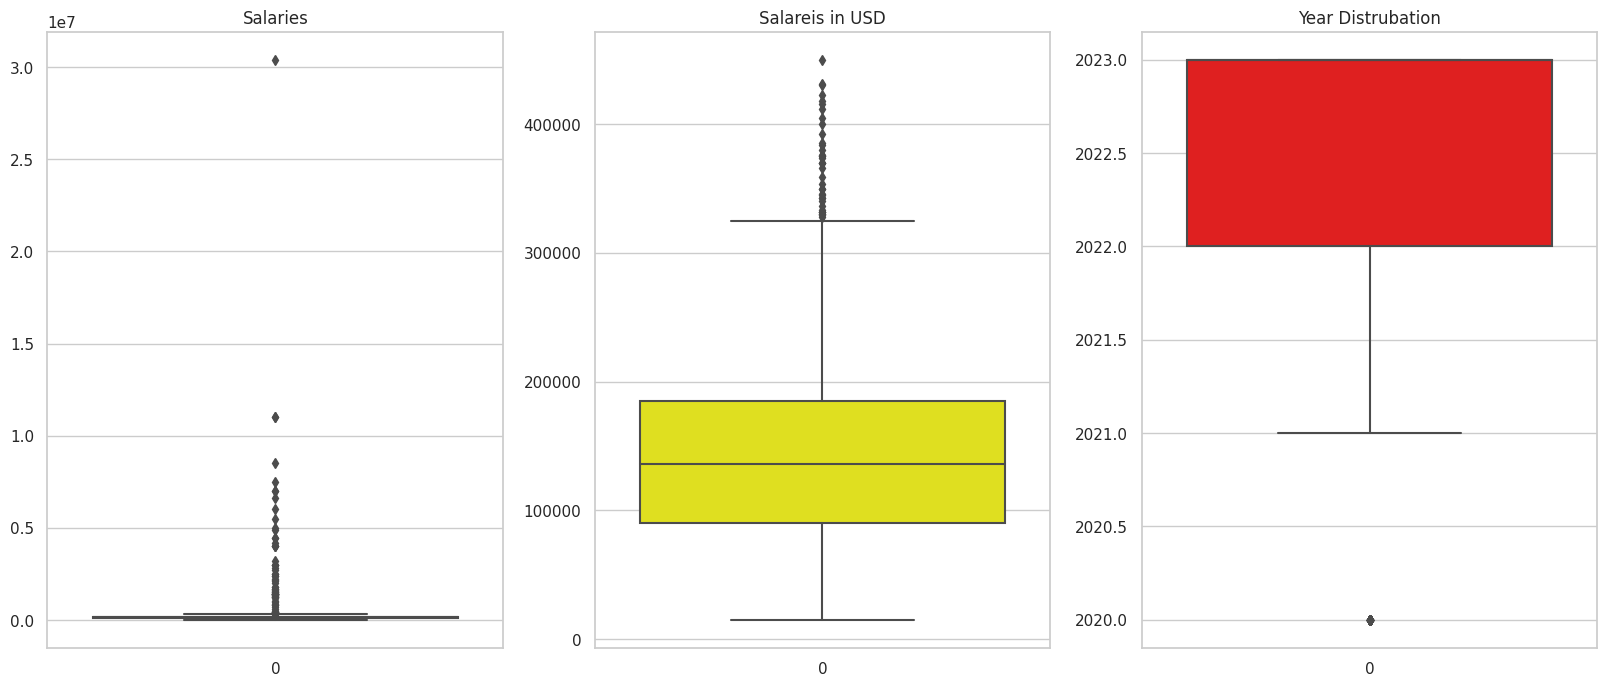

In [119]:
sns.set(style = "whitegrid")

fig,ax = plt.subplots(1, 3, figsize = (20, 8))

sns.boxplot(df['Salary'],ax= ax[0])
sns.boxplot(df['Salary in USD'],color = 'yellow',ax= ax[1])
sns.boxplot(df['Year'], color = 'red',ax= ax[2])

ax[0].set_title('Salaries',)
ax[1].set_title('Salareis in USD',)
ax[2].set_title('Year Distrubation',)

In [120]:
import geopandas as gpd
country_salary = df.groupby('Company Location')['Salary'].mean().reset_index()
Employee_R = df.groupby('Company Location')['Employee Residence'].max().reset_index()


In [121]:
ISO3166 = {
'AD': 'Andorra',
'AE': 'United Arab Emirates',
'AF': 'Afghanistan',
'AG': 'Antigua & Barbuda',
'AI': 'Anguilla',
'AL': 'Albania',
'AM': 'Armenia',
'AN': 'Netherlands Antilles',
'AO': 'Angola',
'AQ': 'Antarctica',
'AR': 'Argentina',
'AS': 'American Samoa',
'AT': 'Austria',
'AU': 'Australia',
'AW': 'Aruba',
'AZ': 'Azerbaijan',
'BA': 'Bosnia and Herzegovina',
'BB': 'Barbados',
'BD': 'Bangladesh',
'BE': 'Belgium',
'BF': 'Burkina Faso',
'BG': 'Bulgaria',
'BH': 'Bahrain',
'BI': 'Burundi',
'BJ': 'Benin',
'BM': 'Bermuda',
'BN': 'Brunei Darussalam',
'BO': 'Bolivia',
'BR': 'Brazil',
'BS': 'Bahama',
'BT': 'Bhutan',
'BU': 'Burma (no longer exists)',
'BV': 'Bouvet Island',
'BW': 'Botswana',
'BY': 'Belarus',
'BZ': 'Belize',
'CA': 'Canada',
'CC': 'Cocos (Keeling) Islands',
'CF': 'Central African Republic',
'CG': 'Congo',
'CH': 'Switzerland',
'CI': 'Côte D\'ivoire (Ivory Coast)',
'CK': 'Cook Iislands',
'CL': 'Chile',
'CM': 'Cameroon',
'CN': 'China',
'CO': 'Colombia',
'CR': 'Costa Rica',
'CS': 'Czechoslovakia (no longer exists)',
'CU': 'Cuba',
'CV': 'Cape Verde',
'CX': 'Christmas Island',
'CY': 'Cyprus',
'CZ': 'Czech Republic',
'DD': 'German Democratic Republic (no longer exists)',
'DE': 'Germany',
'DJ': 'Djibouti',
'DK': 'Denmark',
'DM': 'Dominica',
'DO': 'Dominican Republic',
'DZ': 'Algeria',
'EC': 'Ecuador',
'EE': 'Estonia',
'EG': 'Egypt',
'EH': 'Western Sahara',
'ER': 'Eritrea',
'ES': 'Spain',
'ET': 'Ethiopia',
'FI': 'Finland',
'FJ': 'Fiji',
'FK': 'Falkland Islands (Malvinas)',
'FM': 'Micronesia',
'FO': 'Faroe Islands',
'FR': 'France',
'FX': 'France, Metropolitan',
'GA': 'Gabon',
'GB': 'United Kingdom (Great Britain)',
'GD': 'Grenada',
'GE': 'Georgia',
'GF': 'French Guiana',
'GH': 'Ghana',
'GI': 'Gibraltar',
'GL': 'Greenland',
'GM': 'Gambia',
'GN': 'Guinea',
'GP': 'Guadeloupe',
'GQ': 'Equatorial Guinea',
'GR': 'Greece',
'GS': 'South Georgia and the South Sandwich Islands',
'GT': 'Guatemala',
'GU': 'Guam',
'GW': 'Guinea-Bissau',
'GY': 'Guyana',
'HK': 'Hong Kong',
'HM': 'Heard & McDonald Islands',
'HN': 'Honduras',
'HR': 'Croatia',
'HT': 'Haiti',
'HU': 'Hungary',
'ID': 'Indonesia',
'IE': 'Ireland',
'IL': 'Israel',
'IN': 'India',
'IO': 'British Indian Ocean Territory',
'IQ': 'Iraq',
'IR': 'Islamic Republic of Iran',
'IS': 'Iceland',
'IT': 'Italy',
'JM': 'Jamaica',
'JO': 'Jordan',
'JP': 'Japan',
'KE': 'Kenya',
'KG': 'Kyrgyzstan',
'KH': 'Cambodia',
'KI': 'Kiribati',
'KM': 'Comoros',
'KN': 'St. Kitts and Nevis',
'KP': 'Korea, Democratic People\'s Republic of',
'KR': 'Korea, Republic of',
'KW': 'Kuwait',
'KY': 'Cayman Islands',
'KZ': 'Kazakhstan',
'LA': 'Lao People\'s Democratic Republic',
'LB': 'Lebanon',
'LC': 'Saint Lucia',
'LI': 'Liechtenstein',
'LK': 'Sri Lanka',
'LR': 'Liberia',
'LS': 'Lesotho',
'LT': 'Lithuania',
'LU': 'Luxembourg',
'LV': 'Latvia',
'LY': 'Libyan Arab Jamahiriya',
'MA': 'Morocco',
'MC': 'Monaco',
'MD': 'Moldova, Republic of',
'MG': 'Madagascar',
'MH': 'Marshall Islands',
'ML': 'Mali',
'MN': 'Mongolia',
'MM': 'Myanmar',
'MO': 'Macau',
'MP': 'Northern Mariana Islands',
'MQ': 'Martinique',
'MR': 'Mauritania',
'MS': 'Monserrat',
'MT': 'Malta',
'MU': 'Mauritius',
'MV': 'Maldives',
'MW': 'Malawi',
'MX': 'Mexico',
'MY': 'Malaysia',
'MZ': 'Mozambique',
'NA': 'Namibia',
'NC': 'New Caledonia',
'NE': 'Niger',
'NF': 'Norfolk Island',
'NG': 'Nigeria',
'NI': 'Nicaragua',
'NL': 'Netherlands',
'NO': 'Norway',
'NP': 'Nepal',
'NR': 'Nauru',
'NT': 'Neutral Zone (no longer exists)',
'NU': 'Niue',
'NZ': 'New Zealand',
'OM': 'Oman',
'PA': 'Panama',
'PE': 'Peru',
'PF': 'French Polynesia',
'PG': 'Papua New Guinea',
'PH': 'Philippines',
'PK': 'Pakistan',
'PL': 'Poland',
'PM': 'St. Pierre & Miquelon',
'PN': 'Pitcairn',
'PR': 'Puerto Rico',
'PT': 'Portugal',
'PW': 'Palau',
'PY': 'Paraguay',
'QA': 'Qatar',
'RE': 'Réunion',
'RO': 'Romania',
'RU': 'Russian Federation',
'RW': 'Rwanda',
'SA': 'Saudi Arabia',
'SB': 'Solomon Islands',
'SC': 'Seychelles',
'SD': 'Sudan',
'SE': 'Sweden',
'SG': 'Singapore',
'SH': 'St. Helena',
'SI': 'Slovenia',
'SJ': 'Svalbard & Jan Mayen Islands',
'SK': 'Slovakia',
'SL': 'Sierra Leone',
'SM': 'San Marino',
'SN': 'Senegal',
'SO': 'Somalia',
'SR': 'Suriname',
'ST': 'Sao Tome & Principe',
'SU': 'Union of Soviet Socialist Republics (no longer exists)',
'SV': 'El Salvador',
'SY': 'Syrian Arab Republic',
'SZ': 'Swaziland',
'TC': 'Turks & Caicos Islands',
'TD': 'Chad',
'TF': 'French Southern Territories',
'TG': 'Togo',
'TH': 'Thailand',
'TJ': 'Tajikistan',
'TK': 'Tokelau',
'TM': 'Turkmenistan',
'TN': 'Tunisia',
'TO': 'Tonga',
'TP': 'East Timor',
'TR': 'Turkey',
'TT': 'Trinidad & Tobago',
'TV': 'Tuvalu',
'TW': 'Taiwan, Province of China',
'TZ': 'Tanzania, United Republic of',
'UA': 'Ukraine',
'UG': 'Uganda',
'UM': 'United States Minor Outlying Islands',
'US': 'United States of America',
'UY': 'Uruguay',
'UZ': 'Uzbekistan',
'VA': 'Vatican City State (Holy See)',
'VC': 'St. Vincent & the Grenadines',
'VE': 'Venezuela',
'VG': 'British Virgin Islands',
'VI': 'United States Virgin Islands',
'VN': 'Viet Nam',
'VU': 'Vanuatu',
'WF': 'Wallis & Futuna Islands',
'WS': 'Samoa',
'YD': 'Democratic Yemen (no longer exists)',
'YE': 'Yemen',
'YT': 'Mayotte',
'YU': 'Yugoslavia',
'ZA': 'South Africa',
'ZM': 'Zambia',
'ZR': 'Zaire',
'ZW': 'Zimbabwe',
'ZZ': 'Unknown or unspecified country',
}

In [122]:
country_codes = {v: k for k, v in ISO3166.items()}
country_salaries = {}
for _, row in country_salary.iterrows():
    country = row['Company Location']
    salary = row['Salary']
    if country in country_codes:
        # Convert salary to a color value
        color_value = min(int(salary), 100)  # scale salaries for better color distribution
        country_salaries[country_codes[country]] = color_value

<ipython-input-123-f46a42671193>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


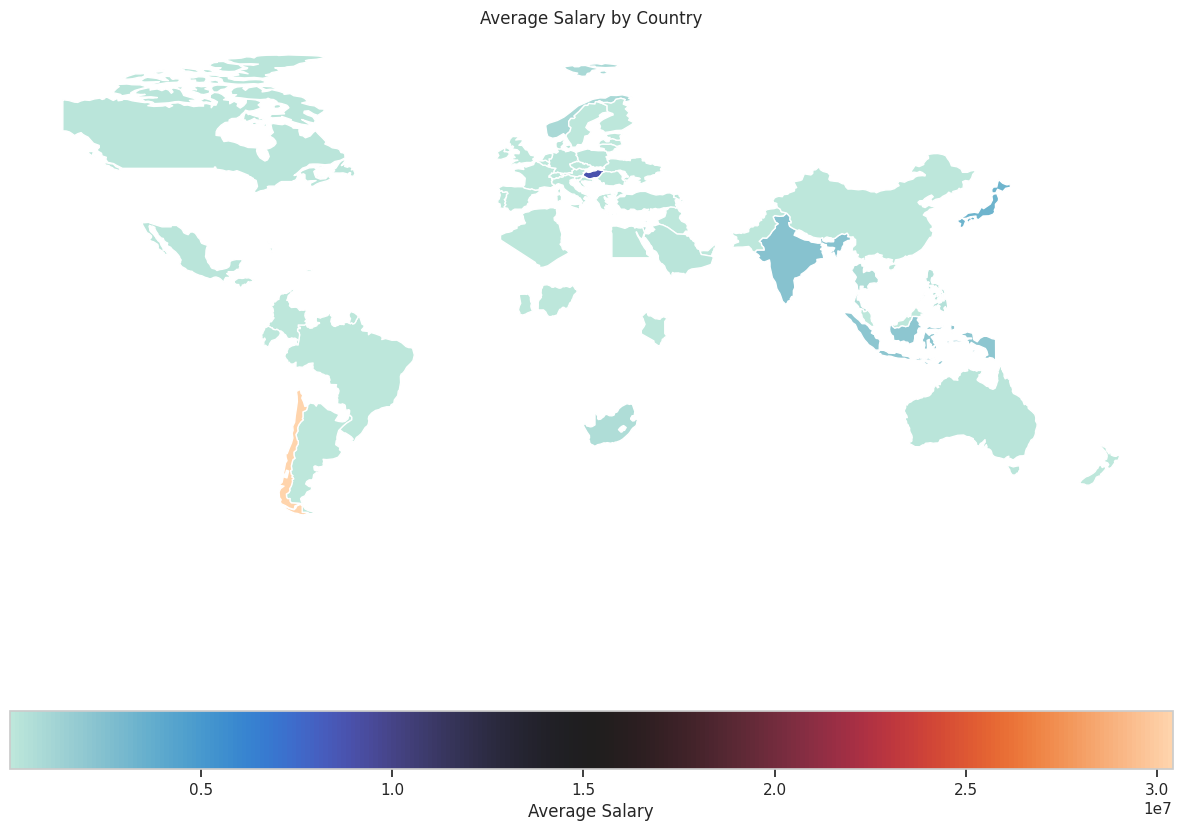

In [123]:
# Load the world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Rename the 'name' column to match our data
world = world.rename(columns={'name': 'Company Location'})

# Merge our data with the world map data
merged = world.set_index('Company Location').join(country_salary.set_index('Company Location'))

# Create a figure and axes
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Create the world map plot
merged.plot(column='Salary', ax=ax, legend=True, cmap= 'icefire', legend_kwds={'label': "Average Salary", 'orientation': "horizontal"})

# Set the title of the plot
plt.title('Average Salary by Country')

# Remove the axis
ax.axis('off')

# Show the plot
plt.show()

In [124]:
country_codes = {v: k for k, v in ISO3166.items()}
Employee_Residence = {}
for _, row in Employee_R.iterrows():
    country = row['Company Location']
    ER= row['Employee Residence']
    if country in country_codes:
        # Convert ER to a color value
        color_value = min((ER))  # scale salaries for better color distribution
        country_salaries[country_codes[country]] = color_value

Text(0.5, 1.0, 'Salary by Company Size')

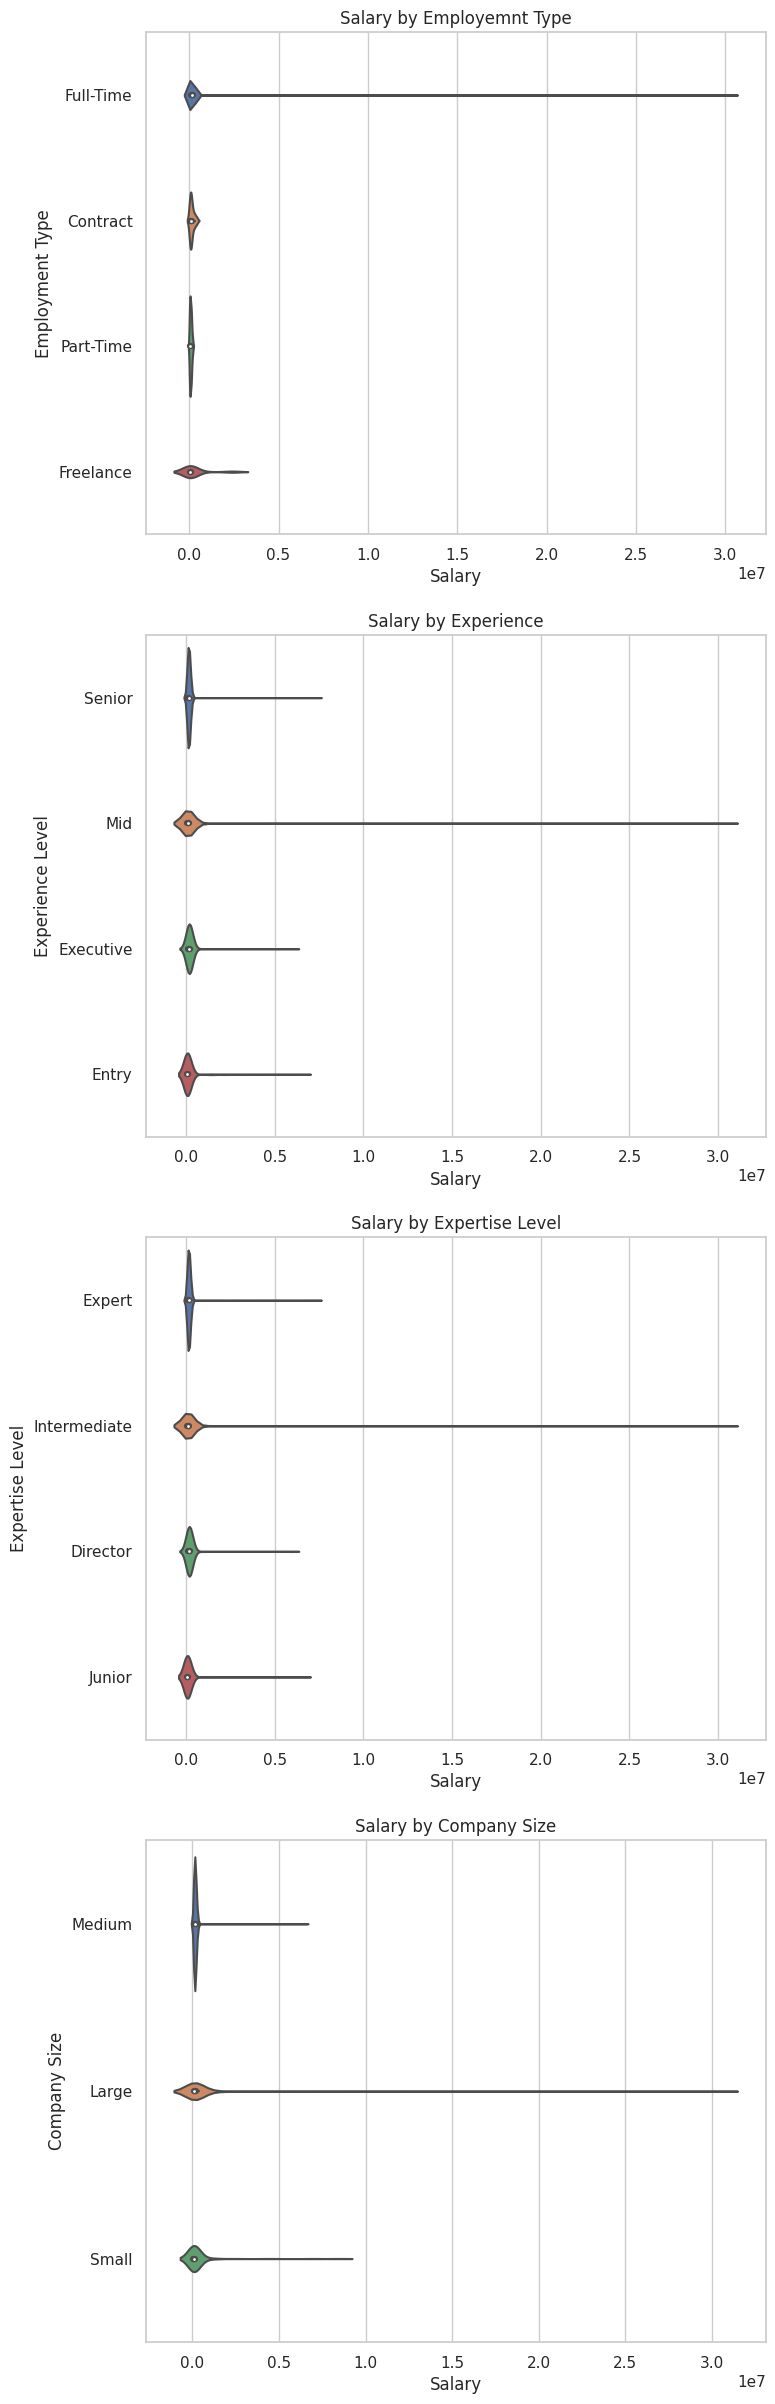

In [125]:
fig, ax = plt.subplots(4, 1, figsize=(8, 30))

sns.violinplot(x = 'Salary', y = 'Employment Type', data = df, ax=ax[0])
sns.violinplot(x = 'Salary', y = 'Experience Level', data = df, ax=ax[1])
sns.violinplot(x = 'Salary', y = 'Expertise Level', data = df, ax=ax[2])
sns.violinplot(x = 'Salary', y = 'Company Size', data = df,  ax=ax[3])

ax[0].set_title('Salary by Employemnt Type')
ax[1].set_title('Salary by Experience')
ax[2].set_title('Salary by Expertise Level')
ax[3].set_title('Salary by Company Size')

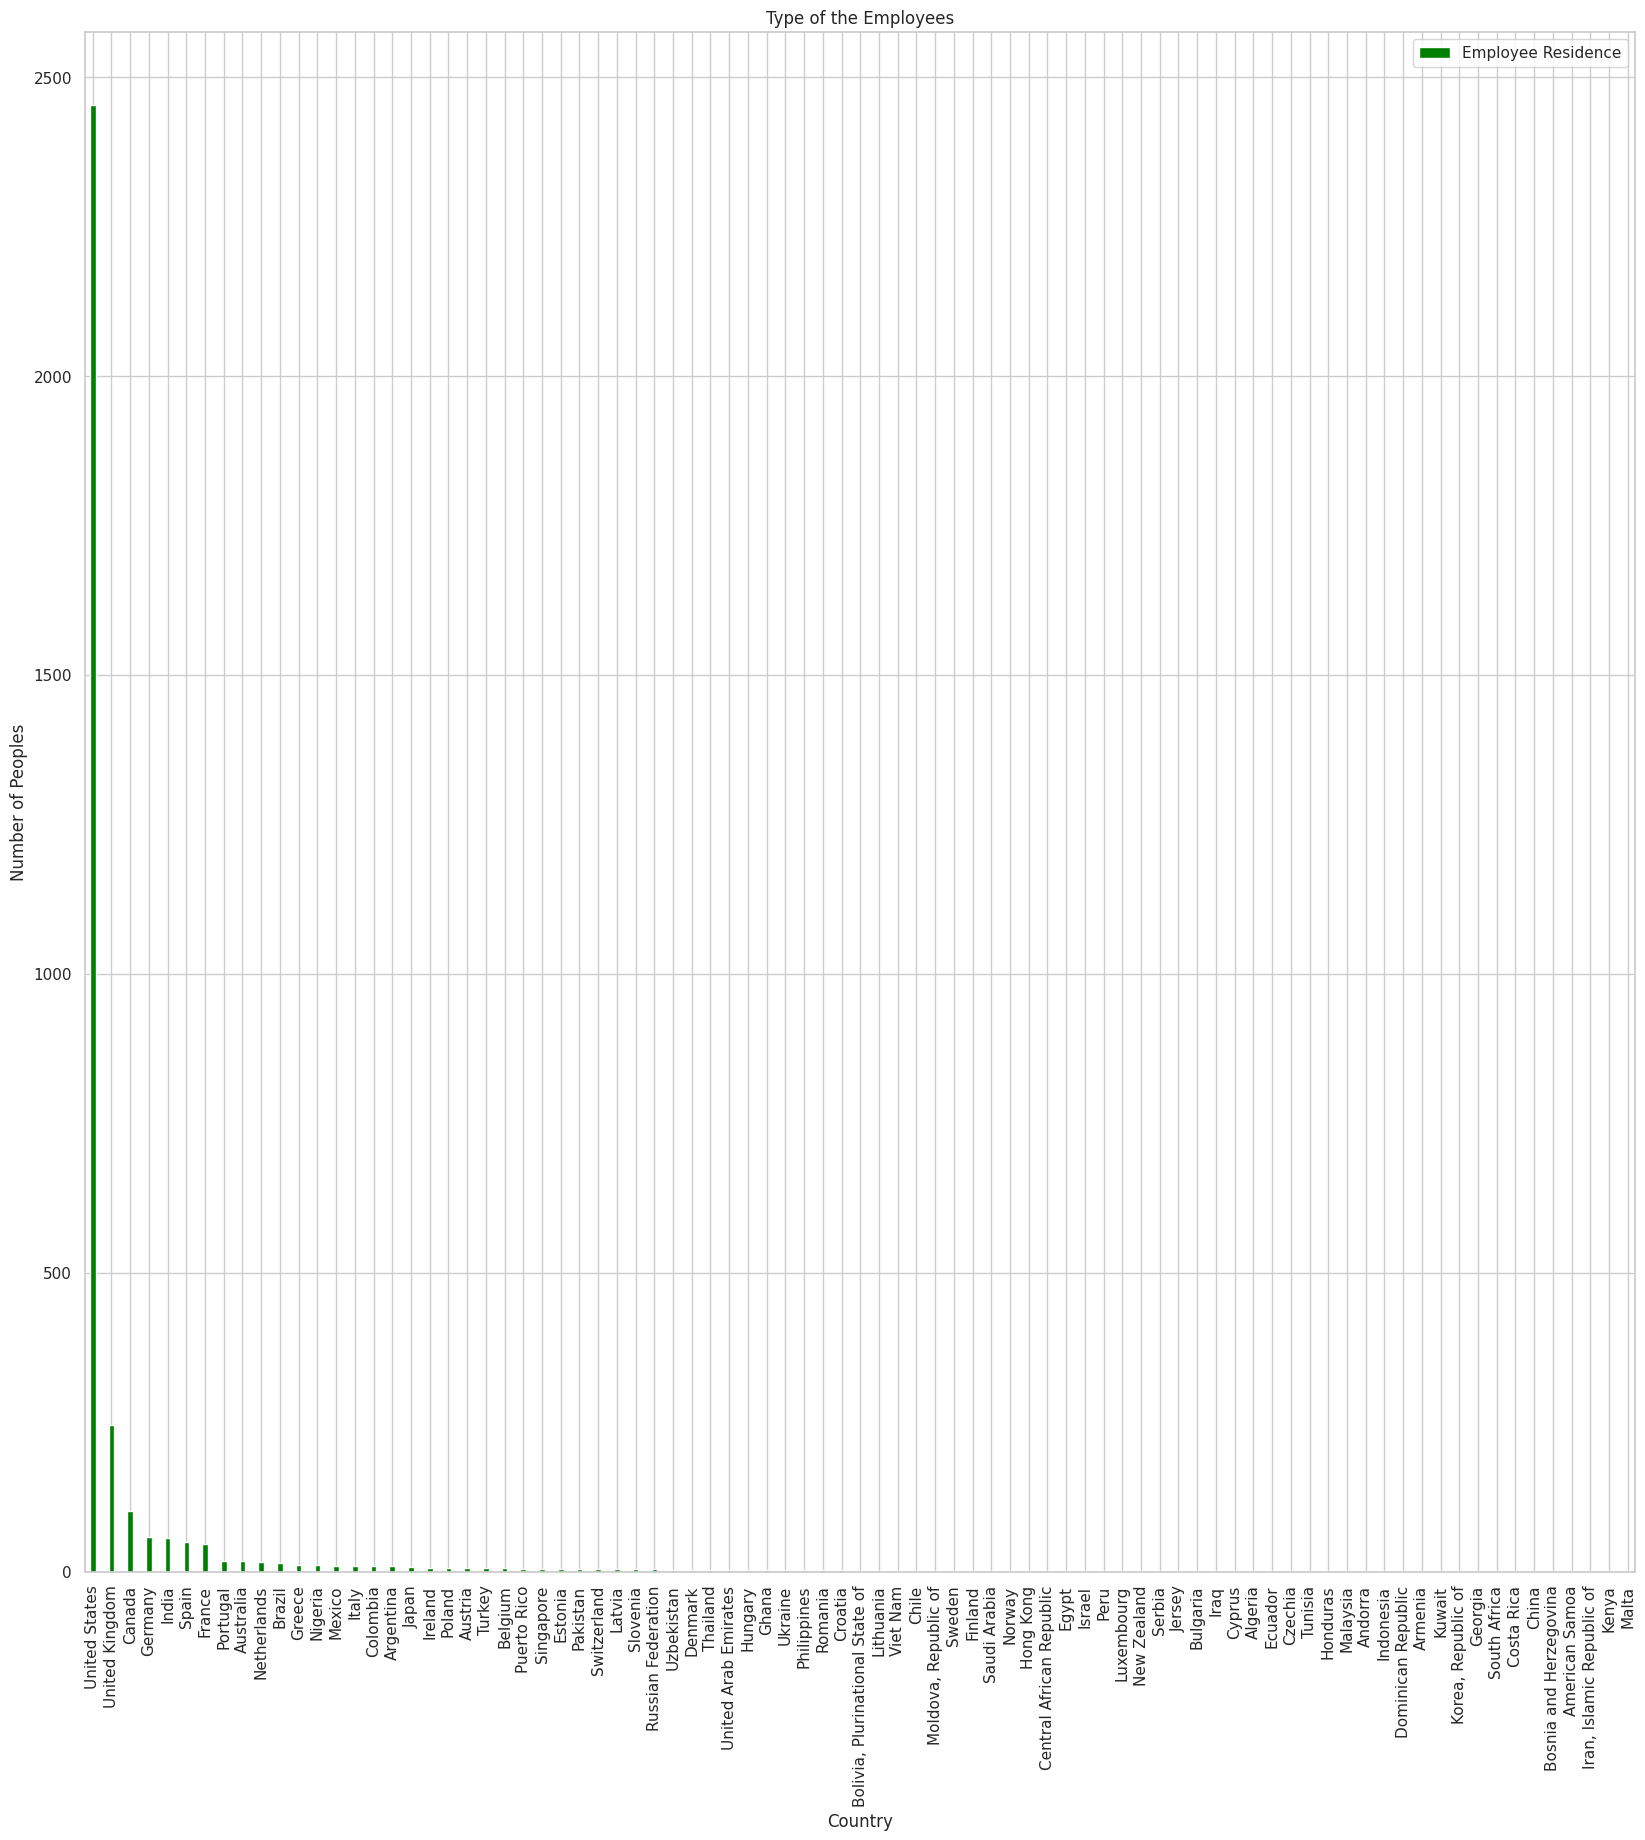

In [126]:
df['Employee Residence'].value_counts(normalize =  False)
df['Employee Residence'].value_counts().plot.bar(figsize = (20,20),width = 0.3, color = 'green')
plt.title('Type of the Employees')
plt.xlabel('Country')
plt.ylabel('Number of Peoples')
plt.legend()
plt.show()


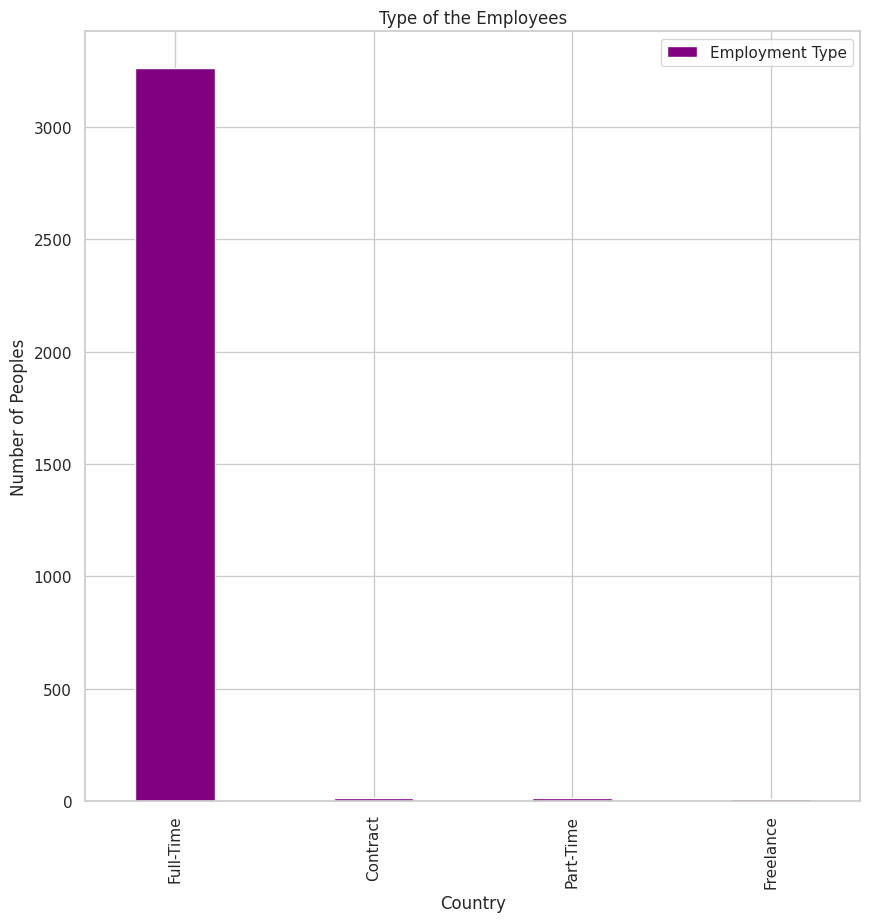

In [127]:
df['Employment Type'].value_counts(normalize =  False)
df['Employment Type'].value_counts().plot.bar(figsize = (10,10), width = 0.4, color = 'purple')
plt.title('Type of the Employees')
plt.xlabel('Country')
plt.ylabel('Number of Peoples')
plt.legend()
plt.show()


In [128]:
df = df.drop('Year', axis = 1)
df = df.drop('Employee Residence', axis = 1)

In [129]:
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Company Size
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,Medium
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,Medium
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,Medium
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,Medium
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,Medium


In [130]:
from sklearn.preprocessing import LabelEncoder
df[["Job Title","Employment Type","Experience Level","Expertise Level","Salary Currency","Company Location", "Company Size"]] = df[["Job Title", "Employment Type","Experience Level","Expertise Level","Salary Currency","Company Location","Company Size"]].apply(LabelEncoder().fit_transform)

In [131]:
df_cat = pd.get_dummies(df[["Job Title","Employment Type","Experience Level","Expertise Level","Salary Currency","Company Location","Company Size"]])

In [132]:
df_cat.style

Output hidden; open in https://colab.research.google.com to view.

In [133]:
df.shape

(3300, 9)

In [134]:
x = df.drop('Salary', axis = 1)
y = df.Salary

In [135]:
train = df.iloc[:1550]
test = df.iloc[1550:]
print(train.shape)
print(test.shape)

(1550, 9)
(1750, 9)


In [136]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2640, 8)
(2640,)
(660, 8)
(660,)


In [137]:
values = []

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

LR =  LinearRegression()
DT =  DecisionTreeRegressor()
RF =  RandomForestRegressor()

LR.fit(x_train, y_train)
DT.fit(x_train, y_train)
RF.fit(x_train, y_train)

LR_Preds = LR.predict(x_test)
DT_Preds = DT.predict(x_test)
RF_Preds = RF.predict(x_test)

LR_rmse = sqrt(mean_squared_error(y_test, LR_Preds))
DT_rmse = sqrt(mean_squared_error(y_test, DT_Preds))
RF_rmse = sqrt(mean_squared_error(y_test, RF_Preds))

LR_Scr = r2_score(y_test, LR_Preds)
values.append(LR_Scr)
DT_Scr = r2_score(y_test, DT_Preds)
values.append(DT_Scr)
RF_Scr = r2_score(y_test, RF_Preds)
values.append(RF_Scr)

print(LR_rmse, DT_rmse, RF_rmse)
print(LR_Scr, DT_Scr, RF_Scr)

473980.85879295337 242162.2098447869 222092.05438948562
0.058821583365961994 0.7543237952380686 0.7933590474802268


In [139]:
# ! pip install catboost
from catboost import Pool, CatBoostRegressor
CB = CatBoostRegressor(iterations = 100000,
                       depth = 5,
                       verbose = 0,
                       learning_rate=0.1)
CB.fit(x_train, y_train)
CB_Preds = CB.predict(x_test)
CB_sc = r2_score(y_test,CB_Preds )
values.append(CB_sc)
CB_sc

0.7311052339463491

In [140]:
from xgboost import XGBRegressor
XB = XGBRegressor(n_estimators = 10000, learning_rate = 0.05, verbosity = 1)
XB.fit(x_train,y_train)
XB_Preds = XB.predict(x_test)
XB_rmse = sqrt(mean_squared_error(y_test, XB_Preds))
XB_Sc = r2_score(y_test, XB_Preds)
values.append(XB_Sc)
print(XB_rmse)
print(XB_Sc)

254696.95612543874
0.7282322857126022


In [141]:
from sklearn import svm
model = svm.SVC()
model.fit(x_train,y_train)
model_Preds = model.predict(x_test)
model_rmse = sqrt(mean_squared_error(y_test, model_Preds))
model_sc = r2_score(y_test, model_Preds)
values.append(model_sc)
print(model_rmse)
print(model_sc)

497937.6135974189
-0.038724127186874346


In [142]:
from sklearn.ensemble import AdaBoostRegressor
Ada = AdaBoostRegressor(estimator= None, n_estimators= 100000, learning_rate= 0.1)
Ada.fit(x_train, y_train)
Ada_Preds = Ada.predict(x_test)
Ada_rmse = sqrt(mean_squared_error(y_test, Ada_Preds))
Ada_Sc = r2_score(y_test, Ada_Preds)
values.append(Ada_Sc)
print(Ada_rmse)
print(Ada_Sc)

236971.9417229377
0.76474210517329


In [143]:
from sklearn.ensemble import HistGradientBoostingRegressor
HGR = HistGradientBoostingRegressor(learning_rate=0.1, max_iter= 100000)
HGR.fit(x_train, y_train)
HGR_Preds = HGR.predict(x_test)
HGR_rmse = sqrt(mean_squared_error(y_test, HGR_Preds))
HGR_Sc = r2_score(y_test, HGR_Preds)
values.append(HGR_Sc)
print(HGR_rmse)
print(HGR_Sc)


291830.7798928596
0.6432101066838276


In [144]:
! pip install tabulate
from tabulate import tabulate

In [145]:
Reg = ["LinearRegression","DecisionTreeRegressor","RandomForestRegressor","CatBoostRegressor","XGBRegressor","SVM","AdaBoostRegressor","HistGradientBoostingRegressor"]


In [146]:
mydata = [Reg , values]
print(tabulate(mydata))

--------------------  ---------------------  ---------------------  ------------------  ------------------  ---------------------  -----------------  -----------------------------
LinearRegression      DecisionTreeRegressor  RandomForestRegressor  CatBoostRegressor   XGBRegressor        SVM                    AdaBoostRegressor  HistGradientBoostingRegressor
0.058821583365961994  0.7543237952380686     0.7933590474802268     0.7311052339463491  0.7282322857126022  -0.038724127186874346  0.76474210517329   0.6432101066838276
--------------------  ---------------------  ---------------------  ------------------  ------------------  ---------------------  -----------------  -----------------------------
